In [24]:
print("Hello world")
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as no

Hello world


In [25]:

tf.config.experimental.list_physical_devices()
tf.test.is_built_with_cuda()

True

In [26]:
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [27]:
x_train.shape

(50000, 32, 32, 3)

In [28]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [29]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[index])
    

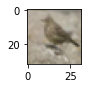

In [30]:
plot_sample(120)

In [31]:
classes = ["airplane", "automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [33]:
classes[y_train[3][0]]
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [34]:
y_train_categorical = keras.utils.to_categorical(
    y_train,num_classes=10, dtype = 'float32'
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
y_test_categorical = keras.utils.to_categorical(
    y_test,num_classes=10, dtype = 'float32'
)

In [36]:
model =keras.Sequential([
    keras.layers.Flatten(input_shape =(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [37]:
model.compile(
    optimizer = 'SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']

)

In [38]:
model.fit(x_train_scaled, y_train_categorical,epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 23s 9ms/step - loss: 1.9270 - accuracy: 0.3054
Epoch 2/50
1563/1563 [==============================] - 15s 9ms/step - loss: 1.6371 - accuracy: 0.4241
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5591 - accuracy: 0.4509
Epoch 4/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.4875 - accuracy: 0.4772
Epoch 5/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4340 - accuracy: 0.4997
Epoch 6/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3834 - accuracy: 0.5125
Epoch 7/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3469 - accuracy: 0.5303
Epoch 8/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3108 - accuracy: 0.5399
Epoch 9/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2732 - accuracy: 0.5548
Epoch 10/50
1563/1563 [==============================] - 15s 10ms/

In [41]:

def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [42]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 74s 44ms/step - loss: 1.9283 - accuracy: 0.3035
1min 15s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [44]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scaled, y_train_categorical, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9334 - accuracy: 0.3004
Epoch 2/5
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6452 - accuracy: 0.4199
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5488 - accuracy: 0.4544
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4943 - accuracy: 0.4711
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4358 - accuracy: 0.4958
54.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
